In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# data, target=return_X_y=True : 데이터하고 타겟만 담아서옴
# data = adarray타입
data, target=load_diabetes(return_X_y=True, as_frame=True)
# 반환값 : data는 데이터프레임(피쳐네임을 지정해줘야함), traget은 시리즈
data


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [3]:
target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [4]:
diadf= load_diabetes(as_frame=True, scaled=False)
diadf.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
FILE = '../data/diabetes.csv'
diadf = pd.read_csv(FILE)
diadf=diadf[diadf['Insulin'] > 0]
diadf.reset_index(drop=True, inplace=True)
diadf


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
389,0,181,88,44,510,43.3,0.222,26,1
390,1,128,88,39,110,36.5,1.057,37,1
391,2,88,58,26,16,28.4,0.766,22,0
392,10,101,76,48,180,32.9,0.171,63,0


In [6]:
# 포도당과 인슐린의 선형관계분석 
# 포도당 수치가 높아질수록 인슐린도 높아지는가?
diadf['Glucose'].value_counts()

Glucose
100    14
99     10
129     9
88      8
95      8
       ..
147     1
141     1
113     1
161     1
149     1
Name: count, Length: 118, dtype: int64

In [7]:
diadf['BMI']

0      28.1
1      43.1
2      31.0
3      30.5
4      30.1
       ... 
389    43.3
390    36.5
391    28.4
392    32.9
393    26.2
Name: BMI, Length: 394, dtype: float64

In [8]:
feacutres=pd.concat([diadf['Glucose'],diadf['Insulin']],axis=1)
feacutres

,Glucose,Insulin
0,89,94
1,137,168
2,78,88
3,197,543
4,189,846
...,...,...
389,181,510
390,128,110
391,88,16
392,101,180


In [9]:
target = diadf['Insulin']
target.value_counts()

Insulin
105    11
130     9
140     9
120     8
94      7
       ..
73      1
171     1
255     1
52      1
112     1
Name: count, Length: 185, dtype: int64

In [10]:
feacutres.corr()

,Glucose,Insulin
Glucose,1.00000,0.58001
Insulin,0.58001,1.00000


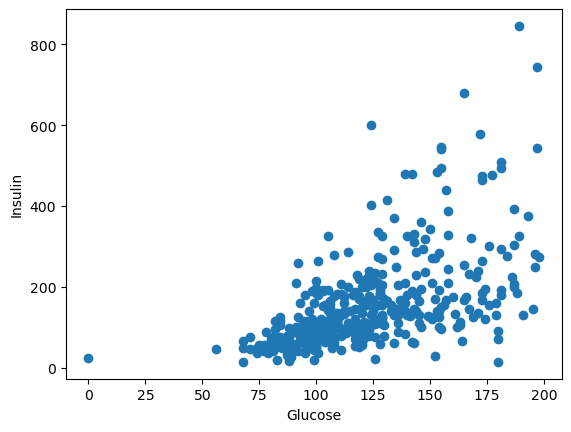

In [11]:
plt.scatter(diadf['Glucose'],target)
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.plot()
plt.show()

In [12]:
# 피쳐와 타겟분리
f_df = diadf[['Glucose']]
targetsr=diadf['Insulin']

In [13]:
# 학습용과 테스트용 데이터셋 분리
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(f_df, targetsr, random_state=10)

In [15]:
print(f'{x_train.shape}, {x_train.ndim}')
print(f'{y_train.shape}, {y_train.ndim}')

print()

print(f'{x_test.shape}, {x_test.ndim}')
print(f'{y_test.shape}, {y_test.ndim}')

(295, 1), 2
(295,), 1

(99, 1), 2
(99,), 1


In [16]:
x_train=x_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

x_test=x_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [17]:
# 피쳐 스케일링

In [18]:
from sklearn.preprocessing import MinMaxScaler
myscalr = MinMaxScaler()

In [19]:
# 스케일러에 데이터셋 전용에 속성값 설정
myscalr.fit(x_train)

MinMaxScaler()

In [20]:
myscalr.min_, myscalr.scale_, myscalr.data_min_, myscalr.data_max_
# 확인

(array([-0.3943662]), array([0.00704225]), array([56.]), array([198.]))

In [21]:
# 학습용 테스트용 데이터셋 스케일링 진행
x_train_s=myscalr.transform(x_train)
x_test_scale=myscalr.transform(x_test)

In [22]:
# 학습진행
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(x_train_s, y_train)

KNeighborsRegressor()

In [23]:
model.n_features_in_, model.n_samples_fit_, model.effective_metric_, model.effective_metric_params_

(1, 295, 'euclidean', {})

In [24]:
# 최적의 K 찾기
scores = {}
for k in range(1,model.n_samples_fit_+1):
    model.n_neighbors=k

    score = model.score(x_test_scale, y_test)

    scores[k]=score

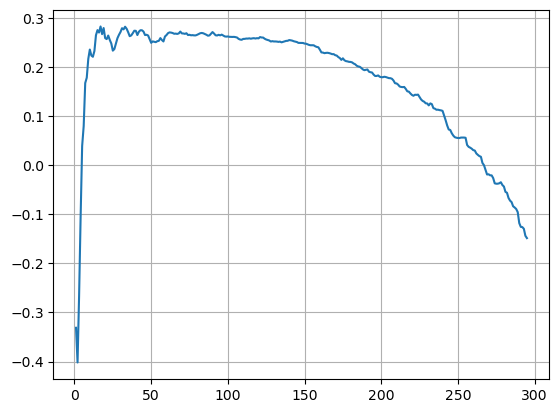

In [25]:
plt.plot(list(scores.keys()), list(scores.values()))
plt.grid()
plt.show()

In [26]:
best_k=sorted(scores.items(), key=lambda x: x[1], reverse=True)[0][0]
best_k

17

In [27]:
# 예측하기
model.n_neighbors=best_k

In [28]:
new_G=input('체내포도당입력 :')
print(f'new_G : {new_G}')

new_G : 150


In [29]:
datadf=pd.DataFrame([[new_G]], columns=['Glucose'])
datadf

,Glucose
0,150


In [30]:
# 피쳐스케일링
d_s = myscalr.transform(datadf)

In [31]:
model.predict(d_s)

array([191.94117647])

In [32]:
distance, index = model.kneighbors(d_s)
print(distance, index, sep='\n')

[[0.         0.00704225 0.00704225 0.01408451 0.01408451 0.01408451
  0.01408451 0.02112676 0.02112676 0.02816901 0.02816901 0.02816901
  0.02816901 0.02816901 0.02816901 0.03521127 0.03521127]]
[[ 55  56 184 132 173   2 110  75 284 239 155 264 149  53 142 276 265]]


In [33]:
x_train.iloc[index.reshape(-1)]

,Glucose
55,150
56,151
184,151
132,148
173,152
2,152
110,152
75,147
284,153
239,146


In [34]:
y_train[index.reshape(-1)].sum()/model.n_neighbors

191.94117647058823

In [ ]:
# 히트맵 코드
#correlation_matrix = dataDF_final.corr()

#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

#plt.title('당뇨병 상관계수')
#plt.show()